<a href="https://colab.research.google.com/github/tchotaneu/Supervised_learning/blob/main/DL_terminology_dropout_batch_norm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

plt.style.use('classic')

from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import BatchNormalization
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from keras.datasets import cifar10
from keras.utils import normalize, to_categorical
from keras.layers import Dropout
from keras.optimizers import SGD, RMSprop


In [4]:
### Normaliser les entrées
#Que se passe-t-il si nous ne normalisons pas les entrées ?
# Il se peut également que nous devions normaliser en fonction de la fonction d'activation.

(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print("The size of training dataset is: ", X_train.shape)
print("The size of testing dataset is: ", X_test.shape)

170498071/170498071 [==============================] - 6s 0us/step
The size of training dataset is:  (50000, 32, 32, 3)
The size of testing dataset is:  (10000, 32, 32, 3)


In [5]:
print("The size of testing dataset is: ", X_test.shape)

The size of testing dataset is:  (10000, 32, 32, 3)


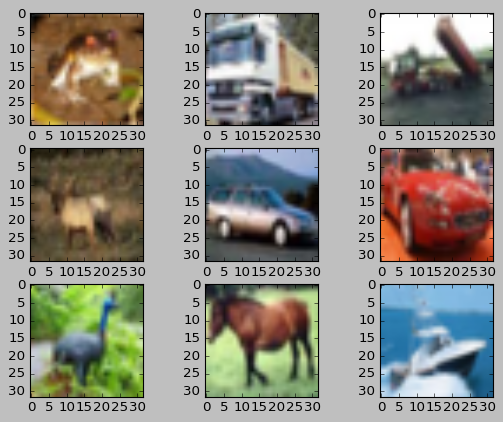

In [6]:
# visualiser quelques images
for i in range(9):
	plt.subplot(330 + 1 + i)
	plt.imshow(X_train[i])
plt.show()

In [7]:
X_train = (X_train.astype('float32')) / 255.
X_test = (X_test.astype('float32')) / 255.


In [8]:
# Imprimer quelques valeurs de y_train pour voir avant et après categorical
print(y_train[0])
print(y_train[1])
print(y_train[10])

[6]
[9]
[4]


In [9]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [10]:
print(y_train[0])
print(y_train[1])
print(y_train[10])

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [11]:
# Créer un modèle avec dropout
drop=0.25

#Kernel = zeros --> Pas de changement dans les poids... comme le problème du gradient de fuite.
#kernel = random --> Meilleures performances, mais lorsque vous relancez l'expérience, les résultats peuvent varier considérablement, en fonction de l'application. 
#kernel = he_uniform --> Idéal pour travailler avec relu. 
#kernel = glorot_uniform --> similaire à he_uniform mais avec une variance différente. he_uniform est préférable avec ReLu.

kernel_initializer =  'he_uniform'  #Also try 'zeros', 'random_uniform', 'he_uniform', 'glorot_uniform'

model1 = Sequential()
model1.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same', input_shape=(32, 32, 3)))
model1.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same'))
model1.add(MaxPooling2D((2, 2)))
model1.add(Dropout(drop))

model1.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same'))
model1.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same'))
model1.add(MaxPooling2D((2, 2)))
model1.add(Dropout(drop))

model1.add(Flatten())
model1.add(Dense(512, activation='relu', kernel_initializer=kernel_initializer))
model1.add(Dropout(drop))
model1.add(Dense(10, activation='softmax'))

opt1 = SGD(lr=0.001, momentum=0.9)
opt2 = RMSprop(lr=0.001, decay=1e-6)
model1.compile(optimizer=opt1, loss='categorical_crossentropy', metrics=['accuracy'])
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                        

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/rmsprop.py:143: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [12]:
#########################################################
#Fit model....
history = model1.fit(X_train, y_train, epochs=25, batch_size=64, validation_data=(X_test, y_test), verbose=1)

Epoch 1/25
782/782 [==============================] - 351s 447ms/step - loss: 1.9480 - accuracy: 0.2907 - val_loss: 1.7072 - val_accuracy: 0.3890
Epoch 2/25
782/782 [==============================] - 353s 451ms/step - loss: 1.6088 - accuracy: 0.4170 - val_loss: 1.4820 - val_accuracy: 0.4634
Epoch 3/25
782/782 [==============================] - 333s 426ms/step - loss: 1.4796 - accuracy: 0.4638 - val_loss: 1.3384 - val_accuracy: 0.5233
Epoch 4/25
782/782 [==============================] - 366s 469ms/step - loss: 1.3764 - accuracy: 0.5046 - val_loss: 1.2596 - val_accuracy: 0.5515
Epoch 5/25
782/782 [==============================] - 345s 441ms/step - loss: 1.2943 - accuracy: 0.5334 - val_loss: 1.1968 - val_accuracy: 0.5751
Epoch 6/25
782/782 [==============================] - 334s 427ms/step - loss: 1.2280 - accuracy: 0.5601 - val_loss: 1.1274 - val_accuracy: 0.6034
Epoch 7/25
782/782 [==============================] - 329s 421ms/step - loss: 1.1713 - accuracy: 0.5833 - val_loss: 1.0775 -

In [13]:
_, acc = model1.evaluate(X_test, y_test)
print("Accuracy = ", (acc * 100.0), "%")

313/313 [==============================] - 16s 52ms/step - loss: 0.6857 - accuracy: 0.7639
Accuracy =  76.38999819755554 %


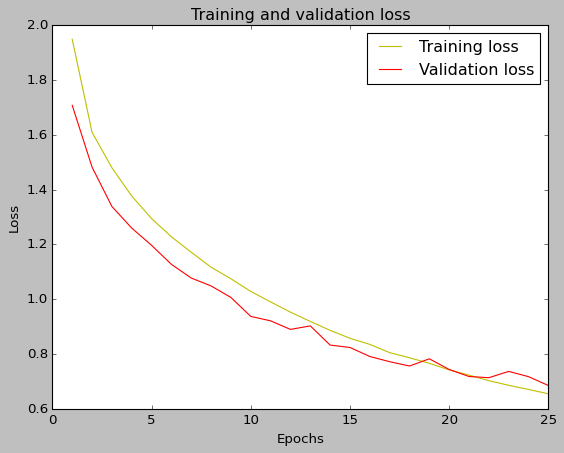

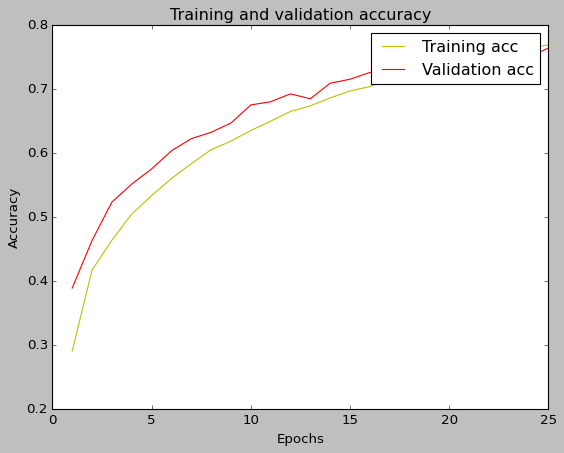

In [14]:
#####################################################################
# Tracer la précision et la perte de l'apprentissage et de la validation à chaque époque.
# Si la perte de validation est inférieure à la perte d'entraînement, 
  #cela peut être dû au fait que nous appliquons une régularisation (Dropout) 
  #pendant l'entraînement, ce qui ne sera pas le cas pendant la validation.
# Si la perte de validation est inférieure à la perte d'entraînement, 
    #cela peut être dû au fait que nous appliquons une régularisation (Dropout) 
    #pendant l'entraînement, ce qui ne sera pas le cas pendant la validation. 
#De plus, la perte d'entraînement est mesurée à chaque époque alors que la validation est effectuée après l'époque.

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()